# Notebook 3: Spike-train statistics

Computational Biology 2 - WS 23/24

Notebooks are based on material created by Katharina Bracher.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

### Problem 1: Important Terms and Definitions
Before working on the Notebook answer the following questions:

- What is the interspike interval?
- In general, what is the distribution of a Poisson random variable?
- How to choose the parameter of the Poisson distribution in the case of spike trains?
- What is the distribution of interspike intervals for a homogenous Poisson process?
- What is the coefficient of variation?
- What is the the Fano factor?

---
### Load the data

We will work with the data set in `spiketrains.npz`. Let's load it.
Print the dataset and explain its structure.

In [12]:
with np.load('./spiketrains.npz', allow_pickle=True) as data:
    spikes1 = data['spikes3_0'].tolist()
    spikes2 = data['spikes7_5'].tolist()

`spiketrains.npz` contains two lists `spikes3_0` and `spikes7_5`, which we call `spikes1` and `spikes2` here for simplicity. Both lists contain several `numpy` arrays. Each array corresponds to a single trial and contains the times of the spikes fired in this trial. All trials are aligend at their start, i.e. spike times are relative to trial start. `spikes3_0` are responses to a 3 second stimulus und `spikes7_5` are responses to a 7.5 s stimulus. 
Have a look at the lists to understand the buildup.

In [30]:
# create json file, save it on disk and load it again
# you can ignore this cell 

execute =False
if execute:
    spikes1 = [arr.tolist() for arr in spikes1]
    spikes2 = [arr.tolist() for arr in spikes2]

    import json

    json_data = {'spikes1': spikes1, 'spikes2': spikes2}

    with open('./datasets/spiketrains.json', 'w') as json_file:
        json.dump(json_data, json_file)

    with open('./datasets/spiketrains.json', 'r') as json_file:
        json_data = json.load(json_file)

    spikes1 = json_data['spikes1']
    spikes2 = json_data['spikes2']

    print(spikes1)
    print(spikes2)


### Problem 2: Spike raster plot
Make an individual spike raster plot for the two lists of spike trains. For each trial, plot the spike times as a small tickmark (or dot). As the y-axis-value use the trial number. 

Hint: use the pyplot-method vlines().

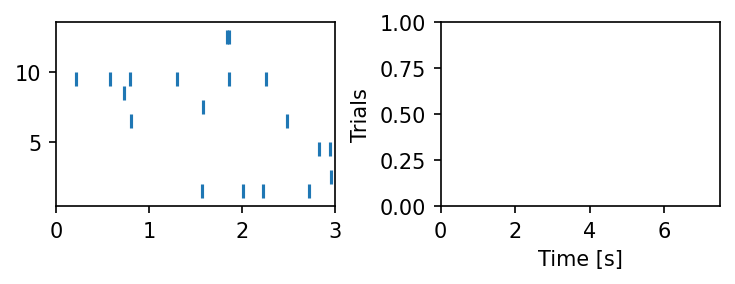

In [14]:
fig = plt.figure(dpi=150, figsize=(5,2))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i,trial in enumerate(spikes1):
    ax1.vlines(trial,i,i+1)
    
ax1.set_xlim((0,3))
ax2.set_xlim((0,7.5))
ax2.set_ylabel('Trials')
ax2.set_xlabel('Time [s]')

plt.tight_layout()
plt.show()

### Problem 3: Spike count rate and trial averaged spike count rate
Calculate and plot the spike count rate (Hz) in each trial for each list. Also mark the average spike count rate, e.g. using `matplotlib`'s `axhline`. 

Plot the trial number on the x-axis and the spike count rate and the trial averaged value on the y-axis.

Text(0.5, 0, 'Trial #')

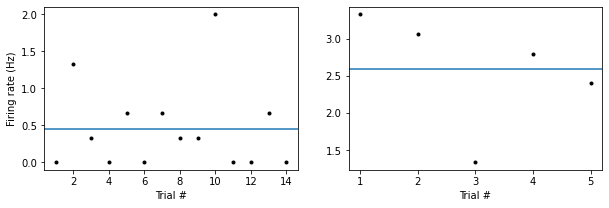

In [32]:
# TODO Python code here

### Problem 4: Interspike interval histogram
Compute the interspike interval histograms for both spike lists. What is the minimal inter spike interval for the both spike lists?

In [23]:
isis1 = []
for trial in spikes1:
    isis1.append(np.diff(trial))
isis1

[array([], dtype=float64),
 array([0.4408, 0.2104, 0.4933]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([0.1144]),
 array([], dtype=float64),
 array([1.6829]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([0.3668, 0.2167, 0.5053, 0.5641, 0.3896]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([0.0258]),
 array([], dtype=float64)]

In [21]:
isis1 = [np.diff(trial) for trial in  spikes1]
isis1
# TODO Python code here

[array([], dtype=float64),
 array([0.4408, 0.2104, 0.4933]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([0.1144]),
 array([], dtype=float64),
 array([1.6829]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([0.3668, 0.2167, 0.5053, 0.5641, 0.3896]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([0.0258]),
 array([], dtype=float64)]

In [34]:
print(min(isis1))
print(min(isis2))

0.025799999999890133
0.015199999999822467


---
### Problem 5: Poisson spike generator

Read the section *The Poisson Spike Generator* in Theoretical Neuroscience by Dayan & Abbott (p. 30).

- Explain how to generate a Poisson spike train.

### Problem 6: Simulation of Poisson spikes
Simulate a spike train of Poisson spikes. The length of the simulated interval should be 1 s and the average firing rate $r$ should be 20 Hz. Plot the spike train.
    
Write a function, that computes spike times iteratively by generating inter spike intervals and plot the raster plot. Use the formular 
$$ t_{i+1} = t_i - ln(x_{\text{rand}})/r $$

Explain the recursion above.
Hint: Distribution of interspike intervals.

In [35]:
def poissonspikes_ISI(rate, time):
    # TODO Python code here
    return spikes

Text(0.5, 0, 'Time (s)')

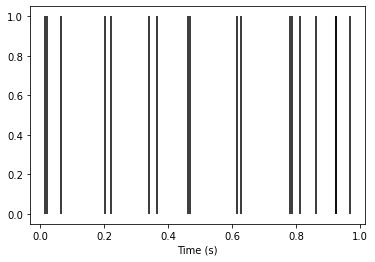

In [36]:
rate = 20  # Hz
time = 1 # s
poisson_spike_times = poissonspikes_ISI(rate, time)

plt.vlines(poisson_spike_times, ymin=0, ymax=1, color='k')
plt.xlabel('Time (s)')

### Problem 7: Raster plot of Poisson spike trains
Make a raster plot of 20 trials of Poisson spike trains. 
Verify that the histogram of spike counts follows a normal distribution and the histogram of interspike intervals an exponential distribution (you might want to increase the trials to 1000). What is the minimal ISI?

In [ ]:
trials=1000
isis = []
spike_count = []

fig, ax = plt.subplots(1, 3, figsize=(15, 3))

for i in range(trials):
    poisson_spike_times = poissonspikes_ISI(rate, time)
    isis.append(np.diff(poisson_spike_times))
    spike_count.append(len(poisson_spike_times))
    if i < 21:
        ax[0].vlines(poisson_spike_times, i, i+1, color='k')
    
isis = np.concatenate(isis)

ax[1].hist(isis, 50, density=True)
ax[2].hist(spike_count)

ax[0].set_ylabel('Trial #')
ax[0].set_xlabel('Time (s)')
ax[1].set_ylabel('probability density')
ax[1].set_xlabel('ISI (s)')
ax[2].set_ylabel('#')
ax[2].set_xlabel('spikes #')
plt.tight_layout()

In [38]:
min(isis)

2.360995622563422e-06

probability of neruon firing p(spike)=r*dt
probability of neruon NOT firing p(n spikes)/dt = rate
1-p(n spikes)=1-(r*dt)

### Problem 8: Statistics of spike trains
Evaluate if your Poisson spikes are indeed in line with the typical spike train statistics for the Poisson process like the coefficient of variation of the ISIs. To calculate the Fano factor, you need more than one spike train. Run the simulations 1000 times and always store the spike counts.


In [39]:
poisson_spike_times = poissonspikes_ISI(rate, time)

In [40]:
# TODO compute CV

CV: 1.2331021007754992


In [41]:
# TODO compute Fano factor

Fano factor: 1.0114855433698904


### Problem 9:
Repeat 6)-8) but write a new function that produces spike times using $r \Delta t$:
the probability of a spike in a small time step $\Delta t$ for a Poisson process is $p[1] = r \Delta t$. To generate Poisson spikes simply sample a random numbers that are uniformly distributed between 0 and 1 ( __Hint__: `np.random.rand`) for each time bin. If the random number is below $r \Delta t$ emit a spike.

In [45]:
dt = 0.00001 # How tho choose dt?
np.arange(0, time, dt).size

100000

In [46]:
def homogeneous_poisson(rate, time, dt):
    # TODO Python code here
    return times, spikes

In [47]:
rate = 20  # in Hz
dt = .001   # in s
print(rate*dt)
time = 1

times, spikes = homogeneous_poisson(rate, time, dt)

0.02


Text(0.5, 0, 'Time (s)')

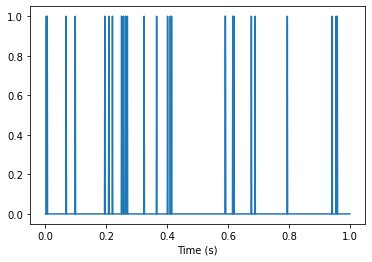

In [48]:
plt.plot(times, spikes, '-')
plt.xlabel('Time (s)')

Text(0.5, 0, 'spikes #')

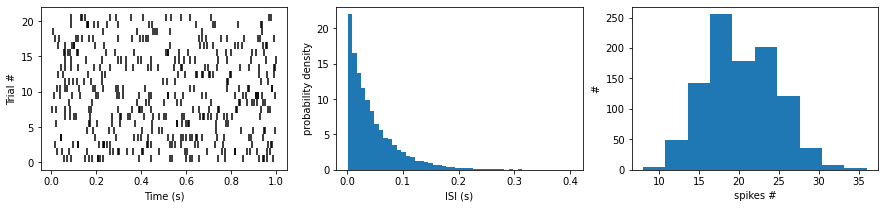

In [49]:
trials=1000
rate=20
time = 1
isis = []
spike_count = []

fig, ax = plt.subplots(1, 3, figsize=(15, 3))
for i, run in enumerate(range(trials)):
    times, spikes = homogeneous_poisson(rate, time, dt)
    poisson_spike_times = times[spikes]
    isis.append(np.diff(poisson_spike_times))
    spike_count.append(len(poisson_spike_times))
    if i < 21:
        ax[0].vlines(poisson_spike_times, i, i+1, color='k')
    
isis = np.concatenate(isis)

ax[1].hist(isis, 50, density=True)
ax[2].hist(spike_count)

ax[0].set_ylabel('Trial #')
ax[0].set_xlabel('Time (s)')
ax[1].set_ylabel('probability density')
ax[1].set_xlabel('ISI (s)')
ax[2].set_ylabel('#')
ax[2].set_xlabel('spikes #')

In [50]:
times, spikes = homogeneous_poisson(rate, time, dt)
poisson_spike_times = times[spikes]

In [51]:
poisson_isis = np.diff(poisson_spike_times)
print('CV:', poisson_isis.std()/poisson_isis.mean())

CV: 0.964588254748804


In [52]:
spks_count = []
for run in range(1000):
    _, spikes = homogeneous_poisson(rate, time, dt)
    spks_count.append(spikes.sum())

In [53]:
print('Fano factor:', np.var(spks_count)/np.mean(spks_count))

Fano factor: 1.008528735632184
